In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-29 11:35:24.157965


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1120.9882)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.2621)tensor(6.6452)tensor(4.1889)tensor(4.0862)tensor(3.3755)tensor(2.7698)tensor(6.5936)tensor(3.2533)tensor(3.3771)tensor(3.4203)tensor(5.7446)tensor(3.0737)tensor(3.4739)tensor(4.3558)tensor(3.6484)tensor(3.9607)tensor(5.9470)tensor(2.9305)tensor(3.2794)tensor(4.2455)tensor(8.7165)tensor(4.2930)tensor(5.9799)tensor(4.4537)tensor(6.8111)tensor(7.1291)tensor(4.4072)tensor(6.3866)tensor(6.6811)tensor(5.8703)tensor(6.8926)tensor(6.8138)tensor(7.6306)tensor(6.1779)tensor(4.2049)tensor(3.1644)tensor(6.6341)tensor(7.5226)tensor(4.4436)tensor(5.5293)tensor(3.0883)tensor(4.7125)tensor(6.6783)tensor(3.1289)tensor(4.6613)tensor(3.5377)tensor(8.9644)tensor(7.9587)tensor(9.2126)tensor(6.8526)tensor(2.8375)tensor(4.4210)tensor(5.1315)tensor(3.2673)tensor(6.2493)tensor(4.3685)tensor(4.5393)tensor(4.5347)tensor(6.2648)tensor(6.9790)tensor(3.1334)tensor(4.9115)tensor(5.6589)tensor(7.2076)tensor(6.1101)tensor(3.6263)tensor(3.1899)tensor(3.4396)tensor(3.2112)tensor(5.3168)tensor(3.1958)tensor

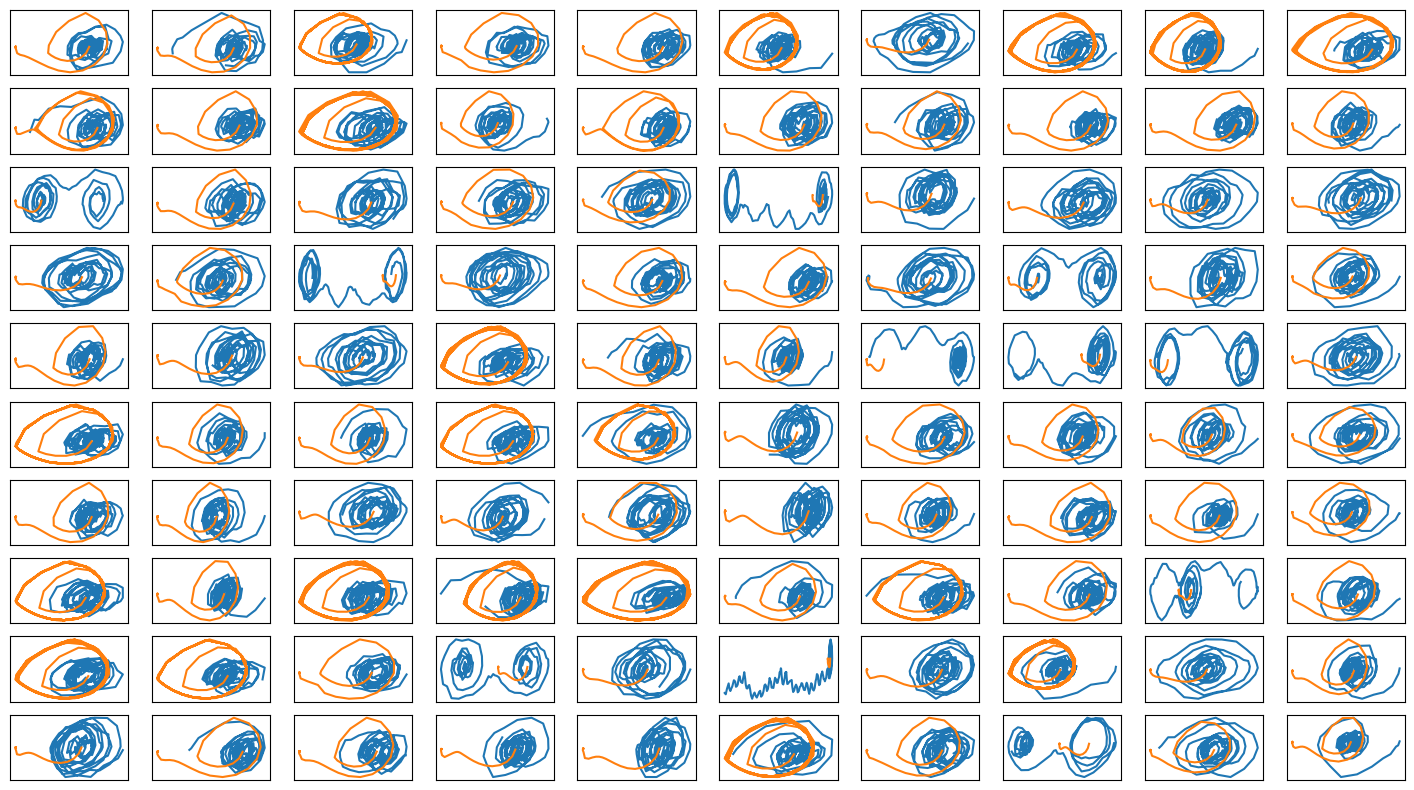

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 15570.26550  validloss 521.61936±0.00000  bestvalidloss 521.61936  last_update 0
train: iter 1  trainloss 419.38176  validloss 383.60215±0.00000  bestvalidloss 383.60215  last_update 0
train: iter 2  trainloss 445.60500  validloss 326.33657±0.00000  bestvalidloss 326.33657  last_update 0
train: iter 3  trainloss 381.33750  validloss 310.83218±0.00000  bestvalidloss 310.83218  last_update 0
train: iter 4  trainloss 355.50498  validloss 301.23408±0.00000  bestvalidloss 301.23408  last_update 0
train: iter 5  trainloss 347.42509  validloss 292.74908±0.00000  bestvalidloss 292.74908  last_update 0
train: iter 6  trainloss 348.29119  validloss 287.10143±0.00000  bestvalidloss 287.10143  last_update 0
train: iter 7  trainloss 339.09962  validloss 282.28769±0.00000  bestvalidloss 282.28769  last_update 0
train: iter 8  trainloss 324.86102  validloss 268.85438±0.00000  bestvalidloss 268.85438  last_update 0
train: iter 9  trainloss 374.98580  validlo

train: iter 78  trainloss -417.99421  validloss -563.96848±0.00000  bestvalidloss -563.96848  last_update 0
train: iter 79  trainloss -404.23081  validloss -575.82500±0.00000  bestvalidloss -575.82500  last_update 0
train: iter 80  trainloss -423.64605  validloss -433.75591±0.00000  bestvalidloss -575.82500  last_update 1
train: iter 81  trainloss -416.48313  validloss -605.30147±0.00000  bestvalidloss -605.30147  last_update 0
train: iter 82  trainloss -375.78801  validloss -596.96921±0.00000  bestvalidloss -605.30147  last_update 1
train: iter 83  trainloss -403.07141  validloss -619.75097±0.00000  bestvalidloss -619.75097  last_update 0
train: iter 84  trainloss 312.42220  validloss -644.47870±0.00000  bestvalidloss -644.47870  last_update 0
train: iter 85  trainloss 1156.56917  validloss 596.72256±0.00000  bestvalidloss -644.47870  last_update 1
train: iter 86  trainloss 232852.16482  validloss 338.12358±0.00000  bestvalidloss -644.47870  last_update 2
train: iter 87  trainloss 485

train: iter 154  trainloss -521.71067  validloss -712.55103±0.00000  bestvalidloss -720.60818  last_update 3
train: iter 155  trainloss -531.41298  validloss -729.06571±0.00000  bestvalidloss -729.06571  last_update 0
train: iter 156  trainloss -527.44678  validloss -723.83861±0.00000  bestvalidloss -729.06571  last_update 1
train: iter 157  trainloss -535.20881  validloss -713.95961±0.00000  bestvalidloss -729.06571  last_update 2
train: iter 158  trainloss -542.44640  validloss -710.90997±0.00000  bestvalidloss -729.06571  last_update 3
train: iter 159  trainloss -543.23369  validloss -746.73831±0.00000  bestvalidloss -746.73831  last_update 0
train: iter 160  trainloss -540.72736  validloss -724.95210±0.00000  bestvalidloss -746.73831  last_update 1
train: iter 161  trainloss -537.58318  validloss -718.29939±0.00000  bestvalidloss -746.73831  last_update 2
train: iter 162  trainloss -534.72119  validloss -733.01393±0.00000  bestvalidloss -746.73831  last_update 3
train: iter 163  tr

train: iter 230  trainloss -629.29191  validloss -782.76053±0.00000  bestvalidloss -806.53668  last_update 13
train: iter 231  trainloss -0.64399  validloss -758.31952±0.00000  bestvalidloss -806.53668  last_update 14
train: iter 232  trainloss -354.10389  validloss 652.73233±0.00000  bestvalidloss -806.53668  last_update 15
train: iter 233  trainloss -396.17589  validloss -728.36913±0.00000  bestvalidloss -806.53668  last_update 16
train: iter 234  trainloss -533.49288  validloss -728.65198±0.00000  bestvalidloss -806.53668  last_update 17
train: iter 235  trainloss -538.40861  validloss -734.29233±0.00000  bestvalidloss -806.53668  last_update 18
train: iter 236  trainloss -522.95591  validloss -621.64691±0.00000  bestvalidloss -806.53668  last_update 19
train: iter 237  trainloss -568.69823  validloss -763.69144±0.00000  bestvalidloss -806.53668  last_update 20
train: iter 238  trainloss -566.82339  validloss -761.61600±0.00000  bestvalidloss -806.53668  last_update 21
train: iter 2

train: iter 305  trainloss -643.42929  validloss -829.25003±0.00000  bestvalidloss -840.35391  last_update 3
train: iter 306  trainloss -637.77890  validloss -788.65939±0.00000  bestvalidloss -840.35391  last_update 4
train: iter 307  trainloss -508.03818  validloss -797.96136±0.00000  bestvalidloss -840.35391  last_update 5
train: iter 308  trainloss -582.01214  validloss -601.03638±0.00000  bestvalidloss -840.35391  last_update 6
train: iter 309  trainloss -607.31340  validloss -828.70177±0.00000  bestvalidloss -840.35391  last_update 7
train: iter 310  trainloss 3097.20039  validloss -740.44094±0.00000  bestvalidloss -840.35391  last_update 8
train: iter 311  trainloss -427.98466  validloss -545.26181±0.00000  bestvalidloss -840.35391  last_update 9
train: iter 312  trainloss -489.45388  validloss -660.81053±0.00000  bestvalidloss -840.35391  last_update 10
train: iter 313  trainloss -514.68501  validloss -692.65484±0.00000  bestvalidloss -840.35391  last_update 11
train: iter 314  

train: iter 380  trainloss -659.09815  validloss -841.05996±0.00000  bestvalidloss -864.07841  last_update 1
train: iter 381  trainloss -662.01393  validloss -860.82507±0.00000  bestvalidloss -864.07841  last_update 2
train: iter 382  trainloss -657.07224  validloss -811.70900±0.00000  bestvalidloss -864.07841  last_update 3
train: iter 383  trainloss -662.71364  validloss -814.79909±0.00000  bestvalidloss -864.07841  last_update 4
train: iter 384  trainloss -664.11699  validloss -820.71733±0.00000  bestvalidloss -864.07841  last_update 5
train: iter 385  trainloss -665.33062  validloss -847.36823±0.00000  bestvalidloss -864.07841  last_update 6
train: iter 386  trainloss -662.94337  validloss -850.63975±0.00000  bestvalidloss -864.07841  last_update 7
train: iter 387  trainloss -653.01025  validloss -858.33794±0.00000  bestvalidloss -864.07841  last_update 8
train: iter 388  trainloss -671.12352  validloss -847.28004±0.00000  bestvalidloss -864.07841  last_update 9
train: iter 389  tr

train: iter 455  trainloss -657.86422  validloss -854.36039±0.00000  bestvalidloss -881.32360  last_update 28
train: iter 456  trainloss -662.85527  validloss -838.01075±0.00000  bestvalidloss -881.32360  last_update 29
train: iter 457  trainloss -672.56279  validloss -813.55046±0.00000  bestvalidloss -881.32360  last_update 30
train: iter 458  trainloss -665.83523  validloss -854.47355±0.00000  bestvalidloss -881.32360  last_update 31
train: iter 459  trainloss -681.76328  validloss -851.05348±0.00000  bestvalidloss -881.32360  last_update 32
train: iter 460  trainloss -681.19578  validloss -843.00366±0.00000  bestvalidloss -881.32360  last_update 33
train: iter 461  trainloss -663.70476  validloss -864.36161±0.00000  bestvalidloss -881.32360  last_update 34
train: iter 462  trainloss -673.86862  validloss -801.32166±0.00000  bestvalidloss -881.32360  last_update 35
train: iter 463  trainloss -688.34753  validloss -806.70193±0.00000  bestvalidloss -881.32360  last_update 36
train: ite

train: iter 530  trainloss -667.80194  validloss -860.88061±0.00000  bestvalidloss -887.04572  last_update 4
train: iter 531  trainloss -679.47597  validloss -888.21438±0.00000  bestvalidloss -888.21438  last_update 0
train: iter 532  trainloss -668.98082  validloss -860.72024±0.00000  bestvalidloss -888.21438  last_update 1
train: iter 533  trainloss -685.75393  validloss -860.40060±0.00000  bestvalidloss -888.21438  last_update 2
train: iter 534  trainloss -686.92366  validloss -863.45381±0.00000  bestvalidloss -888.21438  last_update 3
train: iter 535  trainloss -654.87080  validloss -822.52203±0.00000  bestvalidloss -888.21438  last_update 4
train: iter 536  trainloss -690.72063  validloss -865.66495±0.00000  bestvalidloss -888.21438  last_update 5
train: iter 537  trainloss -691.57786  validloss -876.60914±0.00000  bestvalidloss -888.21438  last_update 6
train: iter 538  trainloss -689.29517  validloss -881.44541±0.00000  bestvalidloss -888.21438  last_update 7
train: iter 539  tr

train: iter 605  trainloss -704.58855  validloss -840.45930±0.00000  bestvalidloss -896.63588  last_update 34
train: iter 606  trainloss -703.84652  validloss -891.30150±0.00000  bestvalidloss -896.63588  last_update 35
train: iter 607  trainloss -704.97593  validloss -879.91693±0.00000  bestvalidloss -896.63588  last_update 36
train: iter 608  trainloss -705.97272  validloss -864.42228±0.00000  bestvalidloss -896.63588  last_update 37
train: iter 609  trainloss -709.00066  validloss -879.82350±0.00000  bestvalidloss -896.63588  last_update 38
train: iter 610  trainloss -710.92573  validloss -878.65237±0.00000  bestvalidloss -896.63588  last_update 39
train: iter 611  trainloss -710.72346  validloss -849.69317±0.00000  bestvalidloss -896.63588  last_update 40
train: iter 612  trainloss -707.29292  validloss -881.50774±0.00000  bestvalidloss -896.63588  last_update 41
train: iter 613  trainloss -715.08364  validloss -887.93075±0.00000  bestvalidloss -896.63588  last_update 42
train: ite

train: iter 680  trainloss -704.20080  validloss -862.28568±0.00000  bestvalidloss -913.16746  last_update 34
train: iter 681  trainloss -710.45344  validloss -887.18157±0.00000  bestvalidloss -913.16746  last_update 35
train: iter 682  trainloss -714.75021  validloss -909.12397±0.00000  bestvalidloss -913.16746  last_update 36
train: iter 683  trainloss -713.62267  validloss -863.73772±0.00000  bestvalidloss -913.16746  last_update 37
train: iter 684  trainloss -13.78659  validloss -881.37249±0.00000  bestvalidloss -913.16746  last_update 38
train: iter 685  trainloss -607.06000  validloss -713.06461±0.00000  bestvalidloss -913.16746  last_update 39
train: iter 686  trainloss -675.22281  validloss -800.94744±0.00000  bestvalidloss -913.16746  last_update 40
train: iter 687  trainloss -715.41128  validloss -859.58672±0.00000  bestvalidloss -913.16746  last_update 41
train: iter 688  trainloss -718.33893  validloss -878.11750±0.00000  bestvalidloss -913.16746  last_update 42
train: iter

train: iter 755  trainloss -593.54573  validloss -615.40847±0.00000  bestvalidloss -914.27314  last_update 52
train: iter 756  trainloss -664.29289  validloss -836.47214±0.00000  bestvalidloss -914.27314  last_update 53
train: iter 757  trainloss -708.32528  validloss -873.89538±0.00000  bestvalidloss -914.27314  last_update 54
train: iter 758  trainloss -708.74876  validloss -880.81737±0.00000  bestvalidloss -914.27314  last_update 55
train: iter 759  trainloss -711.25092  validloss -859.90204±0.00000  bestvalidloss -914.27314  last_update 56
train: iter 760  trainloss -727.67319  validloss -856.81204±0.00000  bestvalidloss -914.27314  last_update 57
train: iter 761  trainloss -710.29788  validloss -841.38676±0.00000  bestvalidloss -914.27314  last_update 58
train: iter 762  trainloss -728.91988  validloss -886.99208±0.00000  bestvalidloss -914.27314  last_update 59
train: iter 763  trainloss -738.92280  validloss -906.82518±0.00000  bestvalidloss -914.27314  last_update 60
train: ite

train: iter 830  trainloss -723.70649  validloss -908.40493±0.00000  bestvalidloss -916.87643  last_update 19
train: iter 831  trainloss 517.37153  validloss -909.46577±0.00000  bestvalidloss -916.87643  last_update 20
train: iter 832  trainloss -376.08819  validloss -137.74256±0.00000  bestvalidloss -916.87643  last_update 21
train: iter 833  trainloss -589.15586  validloss -659.12410±0.00000  bestvalidloss -916.87643  last_update 22
train: iter 834  trainloss -680.28343  validloss -786.34395±0.00000  bestvalidloss -916.87643  last_update 23
train: iter 835  trainloss -716.95113  validloss -872.78101±0.00000  bestvalidloss -916.87643  last_update 24
train: iter 836  trainloss -722.51177  validloss -854.55341±0.00000  bestvalidloss -916.87643  last_update 25
train: iter 837  trainloss -729.53348  validloss -869.60157±0.00000  bestvalidloss -916.87643  last_update 26
train: iter 838  trainloss -732.32630  validloss -889.41062±0.00000  bestvalidloss -916.87643  last_update 27
train: iter

train: iter 905  trainloss -754.29489  validloss -907.53058±0.00000  bestvalidloss -934.59120  last_update 2
train: iter 906  trainloss -747.58012  validloss -910.65365±0.00000  bestvalidloss -934.59120  last_update 3
train: iter 907  trainloss -742.91784  validloss -924.63170±0.00000  bestvalidloss -934.59120  last_update 4
train: iter 908  trainloss -739.25329  validloss -924.85580±0.00000  bestvalidloss -934.59120  last_update 5
train: iter 909  trainloss -743.59615  validloss -890.08556±0.00000  bestvalidloss -934.59120  last_update 6
train: iter 910  trainloss -744.89199  validloss -896.69611±0.00000  bestvalidloss -934.59120  last_update 7
train: iter 911  trainloss -752.08164  validloss -909.35341±0.00000  bestvalidloss -934.59120  last_update 8
train: iter 912  trainloss -757.16756  validloss -935.99796±0.00000  bestvalidloss -935.99796  last_update 0
train: iter 913  trainloss -752.02423  validloss -919.63015±0.00000  bestvalidloss -935.99796  last_update 1
train: iter 914  tr

train: iter 981  trainloss -780.47961  validloss -947.56010±0.00000  bestvalidloss -957.18847  last_update 1
train: iter 982  trainloss -769.63137  validloss -963.77098±0.00000  bestvalidloss -963.77098  last_update 0
train: iter 983  trainloss -785.21909  validloss -955.04265±0.00000  bestvalidloss -963.77098  last_update 1
train: iter 984  trainloss -782.71985  validloss -855.79183±0.00000  bestvalidloss -963.77098  last_update 2
train: iter 985  trainloss -788.17424  validloss -947.42504±0.00000  bestvalidloss -963.77098  last_update 3
train: iter 986  trainloss -792.19955  validloss -845.55087±0.00000  bestvalidloss -963.77098  last_update 4
train: iter 987  trainloss -797.08618  validloss -950.04548±0.00000  bestvalidloss -963.77098  last_update 5
train: iter 988  trainloss -781.55491  validloss -945.70458±0.00000  bestvalidloss -963.77098  last_update 6
train: iter 989  trainloss -756.65930  validloss -951.11971±0.00000  bestvalidloss -963.77098  last_update 7
train: iter 990  tr

train: iter 1056  trainloss -817.01527  validloss -984.68358±0.00000  bestvalidloss -988.29775  last_update 11
train: iter 1057  trainloss -814.90532  validloss -912.51710±0.00000  bestvalidloss -988.29775  last_update 12
train: iter 1058  trainloss -815.19231  validloss -949.58974±0.00000  bestvalidloss -988.29775  last_update 13
train: iter 1059  trainloss -824.49615  validloss -969.25171±0.00000  bestvalidloss -988.29775  last_update 14
train: iter 1060  trainloss -817.54714  validloss -976.72520±0.00000  bestvalidloss -988.29775  last_update 15
train: iter 1061  trainloss -797.50002  validloss -967.63914±0.00000  bestvalidloss -988.29775  last_update 16
train: iter 1062  trainloss -786.09530  validloss -986.06734±0.00000  bestvalidloss -988.29775  last_update 17
train: iter 1063  trainloss -803.22919  validloss -902.62496±0.00000  bestvalidloss -988.29775  last_update 18
train: iter 1064  trainloss -771.68746  validloss -951.91376±0.00000  bestvalidloss -988.29775  last_update 19
t

train: iter 1130  trainloss -851.08581  validloss -977.23019±0.00000  bestvalidloss -1007.98918  last_update 12
train: iter 1131  trainloss -845.72924  validloss -989.72786±0.00000  bestvalidloss -1007.98918  last_update 13
train: iter 1132  trainloss -836.18402  validloss -1006.37441±0.00000  bestvalidloss -1007.98918  last_update 14
train: iter 1133  trainloss -835.79843  validloss -1002.13205±0.00000  bestvalidloss -1007.98918  last_update 15
train: iter 1134  trainloss -849.64690  validloss -926.50934±0.00000  bestvalidloss -1007.98918  last_update 16
train: iter 1135  trainloss -851.04885  validloss -988.41184±0.00000  bestvalidloss -1007.98918  last_update 17
train: iter 1136  trainloss -824.76579  validloss -972.56869±0.00000  bestvalidloss -1007.98918  last_update 18
train: iter 1137  trainloss -828.59805  validloss -974.15611±0.00000  bestvalidloss -1007.98918  last_update 19
train: iter 1138  trainloss -824.25859  validloss -949.41415±0.00000  bestvalidloss -1007.98918  last_

train: iter 1204  trainloss -833.94660  validloss -935.76725±0.00000  bestvalidloss -1022.22744  last_update 2
train: iter 1205  trainloss -825.73488  validloss -992.85169±0.00000  bestvalidloss -1022.22744  last_update 3
train: iter 1206  trainloss -868.77061  validloss -1000.72139±0.00000  bestvalidloss -1022.22744  last_update 4
train: iter 1207  trainloss -863.46932  validloss -1013.87526±0.00000  bestvalidloss -1022.22744  last_update 5
train: iter 1208  trainloss -811.53402  validloss -917.61735±0.00000  bestvalidloss -1022.22744  last_update 6
train: iter 1209  trainloss -850.04021  validloss -980.92578±0.00000  bestvalidloss -1022.22744  last_update 7
train: iter 1210  trainloss -860.92003  validloss -999.47659±0.00000  bestvalidloss -1022.22744  last_update 8
train: iter 1211  trainloss -847.65826  validloss -864.09707±0.00000  bestvalidloss -1022.22744  last_update 9
train: iter 1212  trainloss -854.02776  validloss -1004.25559±0.00000  bestvalidloss -1022.22744  last_update 

train: iter 1278  trainloss -837.44525  validloss -984.61943±0.00000  bestvalidloss -1023.86628  last_update 57
train: iter 1279  trainloss -835.88807  validloss -764.85205±0.00000  bestvalidloss -1023.86628  last_update 58
train: iter 1280  trainloss -878.42589  validloss -1015.63715±0.00000  bestvalidloss -1023.86628  last_update 59
train: iter 1281  trainloss -863.68866  validloss -983.17977±0.00000  bestvalidloss -1023.86628  last_update 60
train: iter 1282  trainloss -863.77594  validloss -1028.43090±0.00000  bestvalidloss -1028.43090  last_update 0
train: iter 1283  trainloss -866.92910  validloss -1015.12423±0.00000  bestvalidloss -1028.43090  last_update 1
train: iter 1284  trainloss -831.43917  validloss -1022.05702±0.00000  bestvalidloss -1028.43090  last_update 2
train: iter 1285  trainloss -869.78045  validloss -982.31795±0.00000  bestvalidloss -1028.43090  last_update 3
train: iter 1286  trainloss -845.95710  validloss -961.52585±0.00000  bestvalidloss -1028.43090  last_up

train: iter 1352  trainloss -898.03025  validloss -1029.14084±0.00000  bestvalidloss -1041.89428  last_update 45
train: iter 1353  trainloss -872.12610  validloss -1042.58815±0.00000  bestvalidloss -1042.58815  last_update 0
train: iter 1354  trainloss -883.45535  validloss -958.49262±0.00000  bestvalidloss -1042.58815  last_update 1
train: iter 1355  trainloss -871.09462  validloss -1044.04543±0.00000  bestvalidloss -1044.04543  last_update 0
train: iter 1356  trainloss -887.90287  validloss -991.13880±0.00000  bestvalidloss -1044.04543  last_update 1
train: iter 1357  trainloss -870.33934  validloss -1001.98397±0.00000  bestvalidloss -1044.04543  last_update 2
train: iter 1358  trainloss -835.27821  validloss -783.61297±0.00000  bestvalidloss -1044.04543  last_update 3
train: iter 1359  trainloss -901.40409  validloss -1007.39378±0.00000  bestvalidloss -1044.04543  last_update 4
train: iter 1360  trainloss -884.26476  validloss -928.54514±0.00000  bestvalidloss -1044.04543  last_upda

train: iter 1425  trainloss -893.71143  validloss -969.52121±0.00000  bestvalidloss -1055.62151  last_update 40
train: iter 1426  trainloss -907.19375  validloss -994.44086±0.00000  bestvalidloss -1055.62151  last_update 41
train: iter 1427  trainloss -890.51174  validloss -969.87094±0.00000  bestvalidloss -1055.62151  last_update 42
train: iter 1428  trainloss -900.95823  validloss -1043.11655±0.00000  bestvalidloss -1055.62151  last_update 43
train: iter 1429  trainloss -840.28513  validloss -1024.45591±0.00000  bestvalidloss -1055.62151  last_update 44
train: iter 1430  trainloss -886.81504  validloss -975.81066±0.00000  bestvalidloss -1055.62151  last_update 45
train: iter 1431  trainloss -884.67045  validloss -960.38499±0.00000  bestvalidloss -1055.62151  last_update 46
train: iter 1432  trainloss -898.18180  validloss -1012.56004±0.00000  bestvalidloss -1055.62151  last_update 47
train: iter 1433  trainloss -900.24941  validloss -1006.69695±0.00000  bestvalidloss -1055.62151  las

train: iter 1498  trainloss -921.84014  validloss -1058.57047±0.00000  bestvalidloss -1062.86222  last_update 24
train: iter 1499  trainloss -927.22161  validloss -1044.38885±0.00000  bestvalidloss -1062.86222  last_update 25
train: iter 1500  trainloss -924.18385  validloss -1023.11701±0.00000  bestvalidloss -1062.86222  last_update 26
train: iter 1501  trainloss -908.58856  validloss -1037.84417±0.00000  bestvalidloss -1062.86222  last_update 27
train: iter 1502  trainloss -879.66162  validloss -1039.57220±0.00000  bestvalidloss -1062.86222  last_update 28
train: iter 1503  trainloss -913.69328  validloss -992.45376±0.00000  bestvalidloss -1062.86222  last_update 29
train: iter 1504  trainloss -899.95483  validloss -1045.34899±0.00000  bestvalidloss -1062.86222  last_update 30
train: iter 1505  trainloss -922.00057  validloss -1008.42175±0.00000  bestvalidloss -1062.86222  last_update 31
train: iter 1506  trainloss -925.99163  validloss -1046.60105±0.00000  bestvalidloss -1062.86222 

train: iter 1571  trainloss -906.66934  validloss -1020.97256±0.00000  bestvalidloss -1069.52338  last_update 57
train: iter 1572  trainloss -883.01405  validloss -894.52833±0.00000  bestvalidloss -1069.52338  last_update 58
train: iter 1573  trainloss -770.92721  validloss -1023.66364±0.00000  bestvalidloss -1069.52338  last_update 59
train: iter 1574  trainloss -845.78690  validloss -759.68968±0.00000  bestvalidloss -1069.52338  last_update 60
train: iter 1575  trainloss -917.69294  validloss -1059.77956±0.00000  bestvalidloss -1069.52338  last_update 61
train: iter 1576  trainloss -922.74799  validloss -1055.03342±0.00000  bestvalidloss -1069.52338  last_update 62
train: iter 1577  trainloss -935.63612  validloss -1029.38291±0.00000  bestvalidloss -1069.52338  last_update 63
train: iter 1578  trainloss -939.59774  validloss -1025.21628±0.00000  bestvalidloss -1069.52338  last_update 64
train: iter 1579  trainloss -914.58092  validloss -1041.52829±0.00000  bestvalidloss -1069.52338  

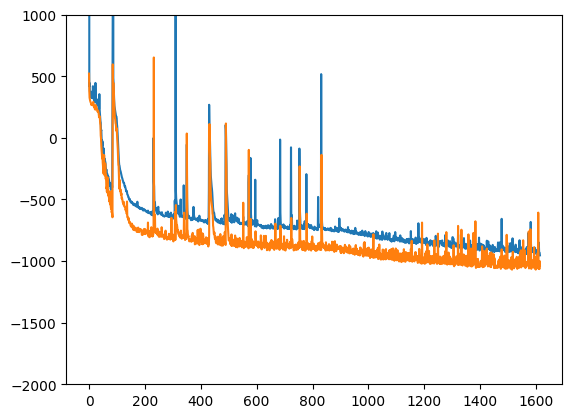

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


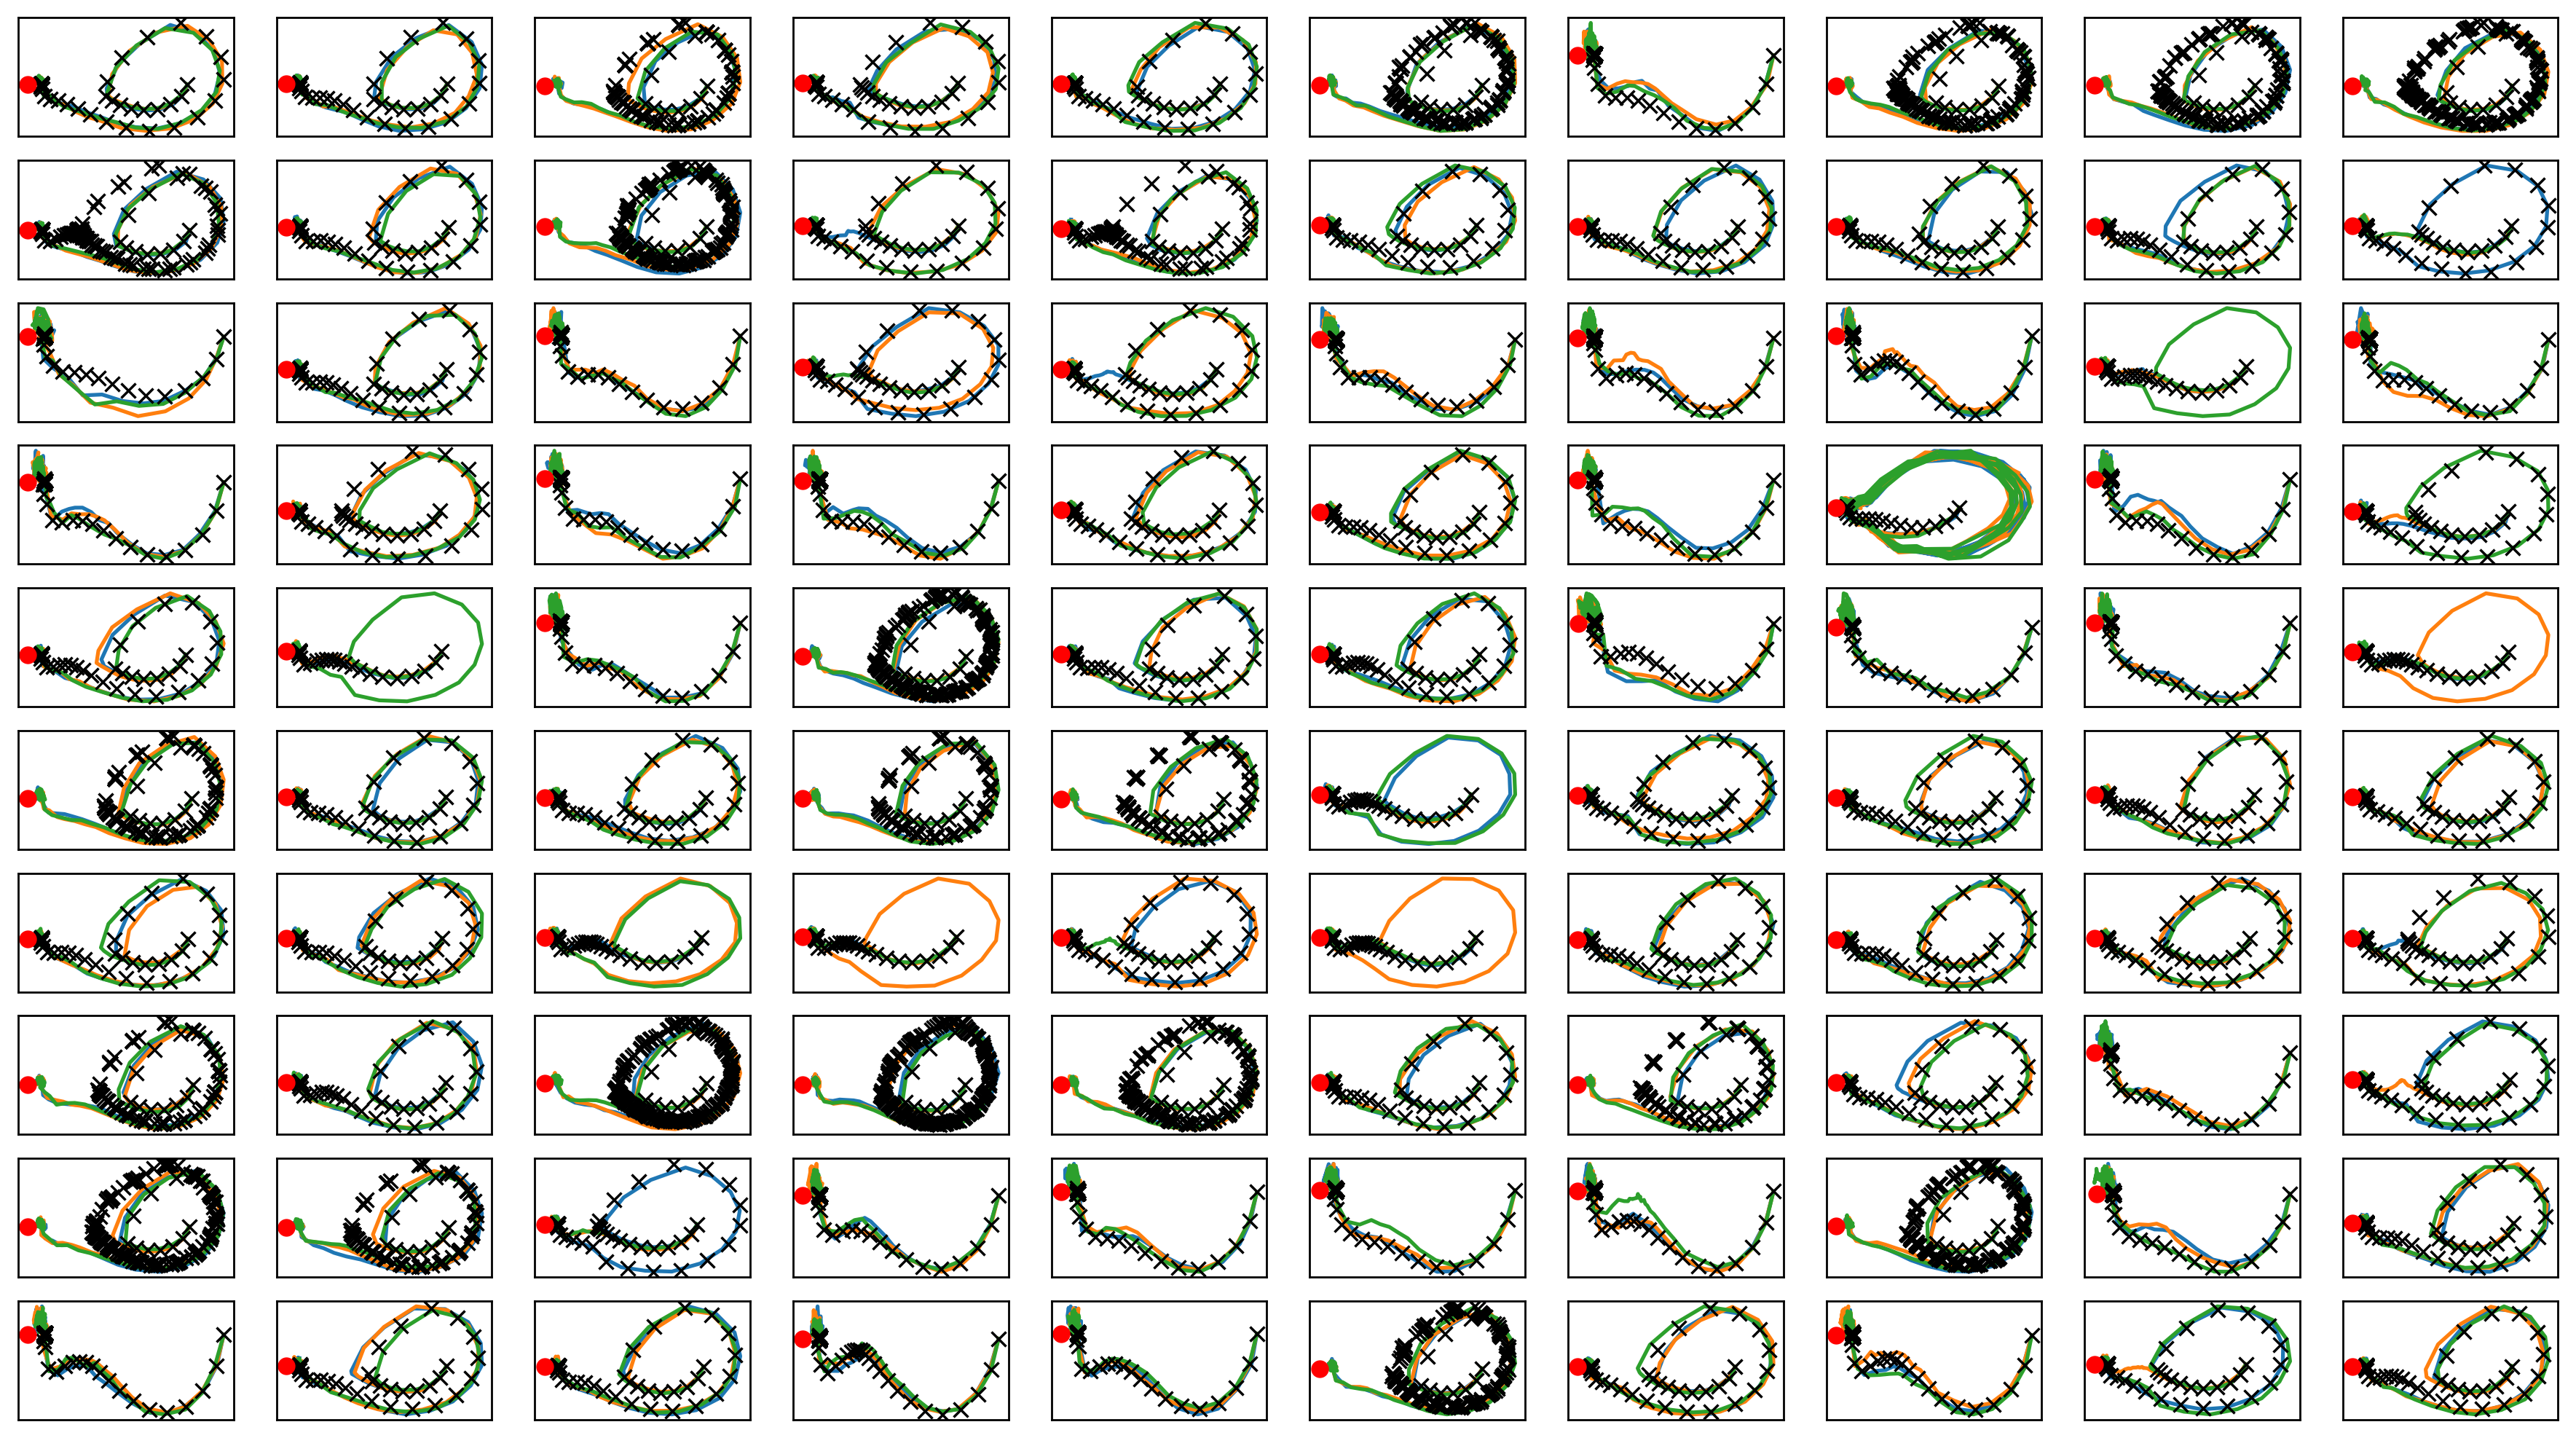

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

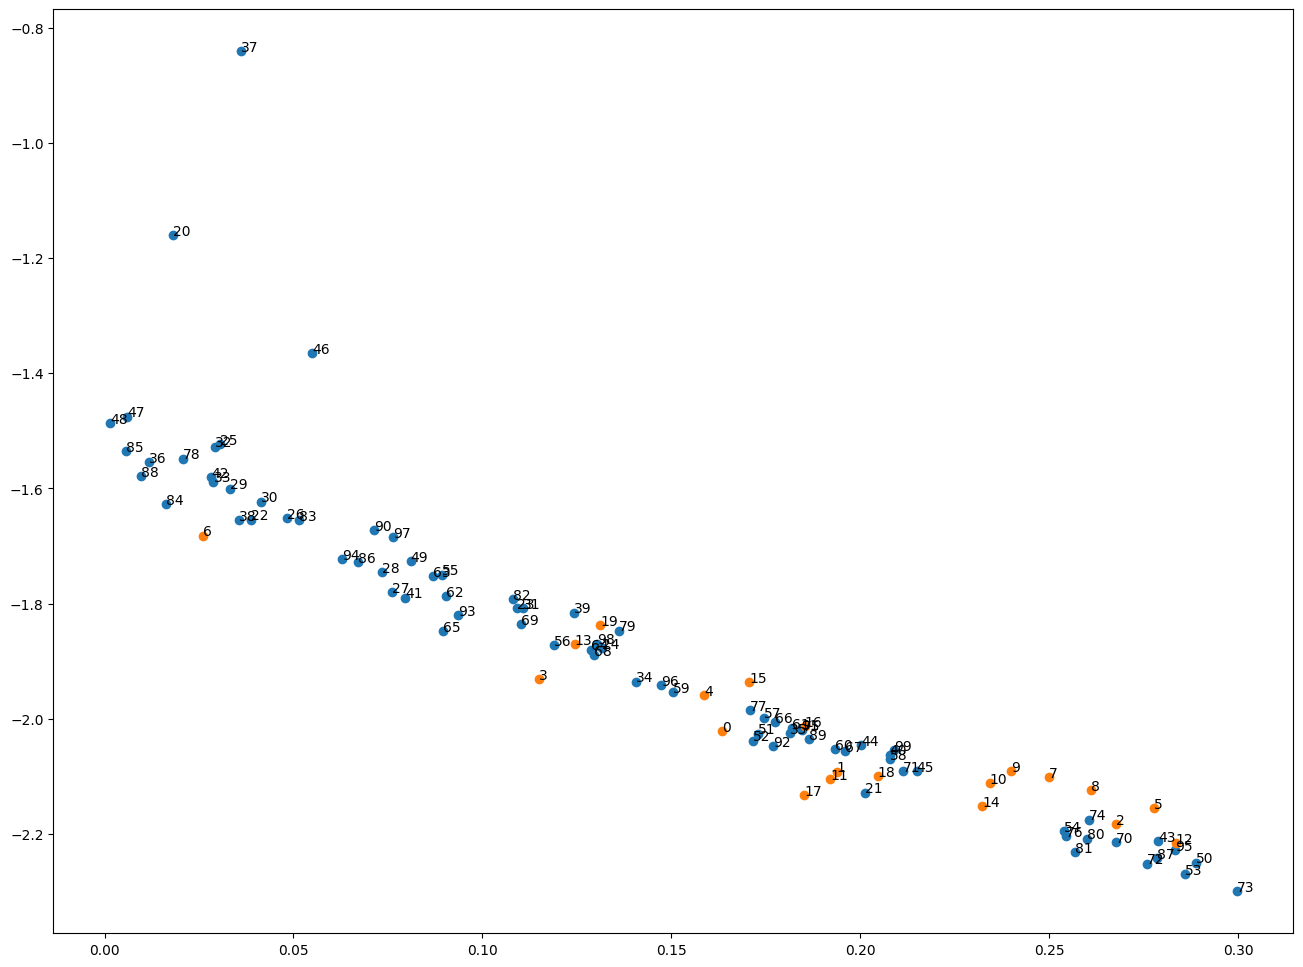

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


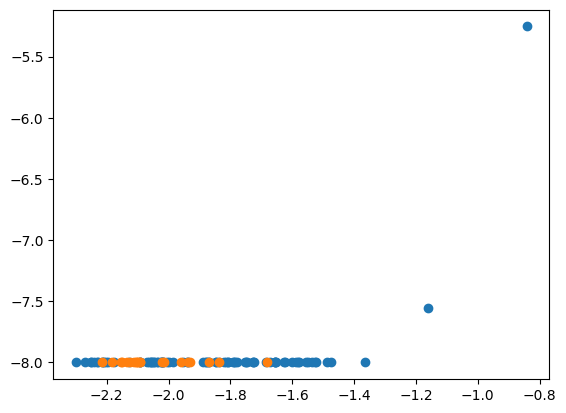

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 2.57796  validloss 3.00420±0.00000  bestvalidloss 3.00420  last_update 0
train: iter 1  trainloss 2.37645  validloss 2.74818±0.00000  bestvalidloss 2.74818  last_update 0
train: iter 2  trainloss 2.22046  validloss 2.55840±0.00000  bestvalidloss 2.55840  last_update 0
train: iter 3  trainloss 2.09281  validloss 2.36604±0.00000  bestvalidloss 2.36604  last_update 0
train: iter 4  trainloss 1.99300  validloss 2.25703±0.00000  bestvalidloss 2.25703  last_update 0
train: iter 5  trainloss 1.91125  validloss 2.14051±0.00000  bestvalidloss 2.14051  last_update 0
train: iter 6  trainloss 1.83087  validloss 2.04572±0.00000  bestvalidloss 2.04572  last_update 0
train: iter 7  trainloss 1.76931  validloss 1.96210±0.00000  bestvalidloss 1.96210  last_update 0
train: iter 8  trainloss 1.71264  validloss 1.89113±0.00000  bestvalidloss 1.89113  last_update 0
train: iter 9  trainloss 1.66214  validloss 1.83447±0.00000  bestvalidloss 1.83447  last_update 0
train: iter 10  trai

train: iter 84  trainloss 0.11976  validloss -0.01676±0.00000  bestvalidloss -0.05798  last_update 1
train: iter 85  trainloss 0.13207  validloss -0.00524±0.00000  bestvalidloss -0.05798  last_update 2
train: iter 86  trainloss 0.09297  validloss -0.04306±0.00000  bestvalidloss -0.05798  last_update 3
train: iter 87  trainloss 0.11199  validloss -0.04801±0.00000  bestvalidloss -0.05798  last_update 4
train: iter 88  trainloss 0.11624  validloss -0.05188±0.00000  bestvalidloss -0.05798  last_update 5
train: iter 89  trainloss 0.12716  validloss -0.03903±0.00000  bestvalidloss -0.05798  last_update 6
train: iter 90  trainloss 0.12131  validloss -0.03358±0.00000  bestvalidloss -0.05798  last_update 7
train: iter 91  trainloss 0.13059  validloss -0.06114±0.00000  bestvalidloss -0.06114  last_update 0
train: iter 92  trainloss 0.10665  validloss -0.04828±0.00000  bestvalidloss -0.06114  last_update 1
train: iter 93  trainloss 0.11844  validloss -0.01536±0.00000  bestvalidloss -0.06114  last

train: iter 171  trainloss 0.11892  validloss -0.03577±0.00000  bestvalidloss -0.07484  last_update 46
train: iter 172  trainloss 0.13468  validloss -0.05128±0.00000  bestvalidloss -0.07484  last_update 47
train: iter 173  trainloss 0.13735  validloss -0.03991±0.00000  bestvalidloss -0.07484  last_update 48
train: iter 174  trainloss 0.11801  validloss -0.05919±0.00000  bestvalidloss -0.07484  last_update 49
train: iter 175  trainloss 0.12515  validloss -0.05970±0.00000  bestvalidloss -0.07484  last_update 50
train: iter 176  trainloss 0.13318  validloss -0.05121±0.00000  bestvalidloss -0.07484  last_update 51
train: iter 177  trainloss 0.10946  validloss -0.04681±0.00000  bestvalidloss -0.07484  last_update 52
train: iter 178  trainloss 0.09895  validloss -0.05669±0.00000  bestvalidloss -0.07484  last_update 53
train: iter 179  trainloss 0.11155  validloss -0.04745±0.00000  bestvalidloss -0.07484  last_update 54
train: iter 180  trainloss 0.12269  validloss -0.07506±0.00000  bestvalid

train: iter 255  trainloss 0.10479  validloss -0.04423±0.00000  bestvalidloss -0.08361  last_update 65
train: iter 256  trainloss 0.13518  validloss -0.06394±0.00000  bestvalidloss -0.08361  last_update 66
train: iter 257  trainloss 0.11804  validloss -0.03584±0.00000  bestvalidloss -0.08361  last_update 67
train: iter 258  trainloss 0.11330  validloss -0.04587±0.00000  bestvalidloss -0.08361  last_update 68
train: iter 259  trainloss 0.10947  validloss -0.03849±0.00000  bestvalidloss -0.08361  last_update 69
train: iter 260  trainloss 0.14020  validloss -0.04408±0.00000  bestvalidloss -0.08361  last_update 70
train: iter 261  trainloss 0.10561  validloss -0.06634±0.00000  bestvalidloss -0.08361  last_update 71
train: iter 262  trainloss 0.11026  validloss -0.03575±0.00000  bestvalidloss -0.08361  last_update 72
train: iter 263  trainloss 0.12308  validloss -0.03384±0.00000  bestvalidloss -0.08361  last_update 73
train: iter 264  trainloss 0.09348  validloss -0.05598±0.00000  bestvalid

train: iter 341  trainloss 0.10161  validloss -0.03193±0.00000  bestvalidloss -0.09494  last_update 23
train: iter 342  trainloss 0.13179  validloss -0.07880±0.00000  bestvalidloss -0.09494  last_update 24
train: iter 343  trainloss 0.10761  validloss -0.06329±0.00000  bestvalidloss -0.09494  last_update 25
train: iter 344  trainloss 0.11445  validloss -0.02916±0.00000  bestvalidloss -0.09494  last_update 26
train: iter 345  trainloss 0.10895  validloss -0.04866±0.00000  bestvalidloss -0.09494  last_update 27
train: iter 346  trainloss 0.13738  validloss -0.05936±0.00000  bestvalidloss -0.09494  last_update 28
train: iter 347  trainloss 0.12069  validloss -0.06383±0.00000  bestvalidloss -0.09494  last_update 29
train: iter 348  trainloss 0.14345  validloss -0.05227±0.00000  bestvalidloss -0.09494  last_update 30
train: iter 349  trainloss 0.10147  validloss -0.04191±0.00000  bestvalidloss -0.09494  last_update 31
train: iter 350  trainloss 0.11203  validloss -0.03619±0.00000  bestvalid

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-1.8649, -2.6096], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 21.60745  validloss 31.05886±0.00000  bestvalidloss 31.05886  last_update 0
train: iter 1  trainloss 11.95512  validloss 17.79165±0.00000  bestvalidloss 17.79165  last_update 0
train: iter 2  trainloss 7.34788  validloss 9.36509±0.00000  bestvalidloss 9.36509  last_update 0
train: iter 3  trainloss 5.51840  validloss 5.90125±0.00000  bestvalidloss 5.90125  last_update 0
train: iter 4  trainloss 4.68508  validloss 4.25922±0.00000  bestvalidloss 4.25922  last_update 0
train: iter 5  trainloss 4.34366  validloss 3.38353±0.00000  bestvalidloss 3.38353  last_update 0
train: iter 6  trainloss 4.08834  validloss 2.87491±0.00000  bestvalidloss 2.87491  last_update 0
train: iter 7  trainloss 3.88815  validloss 2.63667±0.00000  bestvalidloss 2.63667  last_update 0
train: iter 8  trainloss 3.71945  validloss 2.48843±0.00000  bestvalidloss 2.48843  last_update 0
train: iter 9  trainloss 3.54141  validloss 2.43437±0.00000  bestvalidloss 2.43437  last_update 0
train: iter 10

train: iter 83  trainloss 2.10759  validloss 2.23374±0.00000  bestvalidloss 1.81479  last_update 51
train: iter 84  trainloss 2.13583  validloss 1.92660±0.00000  bestvalidloss 1.81479  last_update 52
train: iter 85  trainloss 2.17435  validloss 2.00700±0.00000  bestvalidloss 1.81479  last_update 53
train: iter 86  trainloss 2.13932  validloss 2.02361±0.00000  bestvalidloss 1.81479  last_update 54
train: iter 87  trainloss 2.12327  validloss 1.91921±0.00000  bestvalidloss 1.81479  last_update 55
train: iter 88  trainloss 2.14065  validloss 1.97138±0.00000  bestvalidloss 1.81479  last_update 56
train: iter 89  trainloss 2.12076  validloss 2.23150±0.00000  bestvalidloss 1.81479  last_update 57
train: iter 90  trainloss 2.14058  validloss 2.03313±0.00000  bestvalidloss 1.81479  last_update 58
train: iter 91  trainloss 2.17350  validloss 2.07332±0.00000  bestvalidloss 1.81479  last_update 59
train: iter 92  trainloss 2.13351  validloss 2.13647±0.00000  bestvalidloss 1.81479  last_update 60


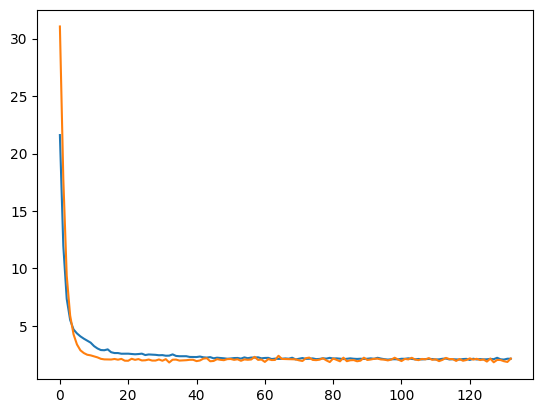

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.4745)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.4496)


In [21]:
print(vi.h_min_tilde)

-6.162032


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

2.105527442197999
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

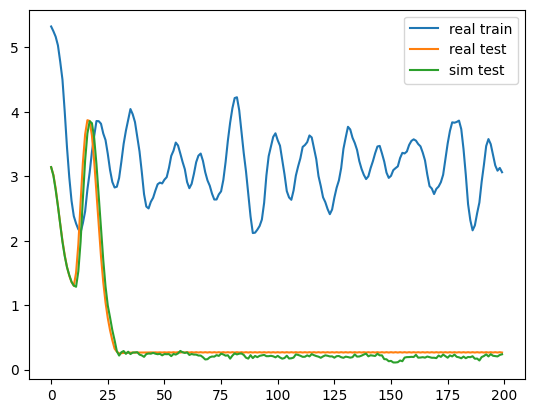

encoder [-1.8378204 -8.       ]
initial_belief tensor([-1.8649, -2.6096])
real train tensor([-1.8902, -8.0103])
real test tensor([-1.7265, -7.9832])
sim tensor([-1.8612, -2.6130])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.8163265306122454


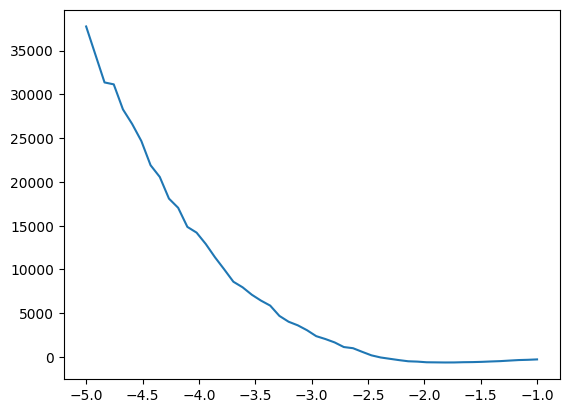

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.40710382279824747
tensor([-1.2660])
